
# Lab 1, 3375, Постобаев Михаил Васильевич
**Тема:** Исследование набора данных — *Wine Quality (red wine)*

**Краткое содержание ноутбука:**  
1. Описание набора данных (источник, признаки, типы)  
2. Загрузка данных  
3. Предобработка (проверка пропусков, типов)  
4. Статистический анализ (mean, std)  
5. Визуализации: гистограммы, boxplot (поиск выбросов)  
6. Обработка пропусков (варианты)  
7. Анализ корреляций: матрица корреляций, heatmap  
8. Матрица графиков рассеяния (scatter matrix)  
9. Выводы 

> 



## 1. Выбор и описание датасета

**Выбранный датасет:** Wine Quality — *Red Wine* (UCI / Kaggle).  
**Источник (пример):** UCI ML Repository — _winequality-red.csv_  
**Ссылка для скачивания (пример):** https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

**Предметная область:** виноделие — физико‑химические свойства вина и оценка качества.  
**Тип данных:** реальные измерения (числовые характеристики).  
**Целевая переменная (разметка):** `quality` — оценка качества вина (обычно целое число от 0 до 10).

**Признаки (атрибуты):**  
- fixed acidity — фиксированная кислотность (число)  
- volatile acidity — летучая кислотность (число)  
- citric acid — лимонная кислота (число)  
- residual sugar — остаточный сахар (число)  
- chlorides — хлориды (число)  
- free sulfur dioxide — свободный диоксид серы (число)  
- total sulfur dioxide — общий диоксид серы (число)  
- density — плотность (число)  
- pH — pH (число)  
- sulphates — сульфаты (число)  
- alcohol — алкоголь (число)  
- quality — качество (целочисленный, метка)



In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)
sns.set(style='whitegrid')


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

try:
    df = pd.read_csv(url, sep=';')
    print('Датасет загружен с UCI. Форма:', df.shape)
except Exception as e:
    print('Не удалось загрузить с UCI (в вашей среде нет интернета).')
    print('Если у вас есть локальный файл winequality-red.csv, загрузите его в каталог и выполните:')
    print("df = pd.read_csv('winequality-red.csv', sep=';')")
    raise


df.head()


Датасет загружен с UCI. Форма: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:

# 4. Общее описание данных
df.info()
print('\nСтатистическое описание (describe):')
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

Статистическое описание (describe):


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [4]:

# 5. Проверка пропущенных значений
missing = df.isna().sum()
missing[missing>0]
print('\nВсего пропусков по всем столбцам:', missing.sum())
missing



Всего пропусков по всем столбцам: 0


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:

# 6. Среднее и стандартное отклонение для каждого атрибута
stats_df = pd.DataFrame({
    'mean': df.mean(),
    'std': df.std(),
    'min': df.min(),
    'max': df.max(),
    'median': df.median()
})
stats_df


,mean,std,min,max,median
fixed acidity,8.319637,1.741096,4.60000,15.90000,7.90000
volatile acidity,0.527821,0.179060,0.12000,1.58000,0.52000
citric acid,0.270976,0.194801,0.00000,1.00000,0.26000
residual sugar,2.538806,1.409928,0.90000,15.50000,2.20000
chlorides,0.087467,0.047065,0.01200,0.61100,0.07900
free sulfur dioxide,15.874922,10.460157,1.00000,72.00000,14.00000
total sulfur dioxide,46.467792,32.895324,6.00000,289.00000,38.00000
density,0.996747,0.001887,0.99007,1.00369,0.99675
pH,3.311113,0.154386,2.74000,4.01000,3.31000
sulphates,0.658149,0.169507,0.33000,2.00000,0.62000


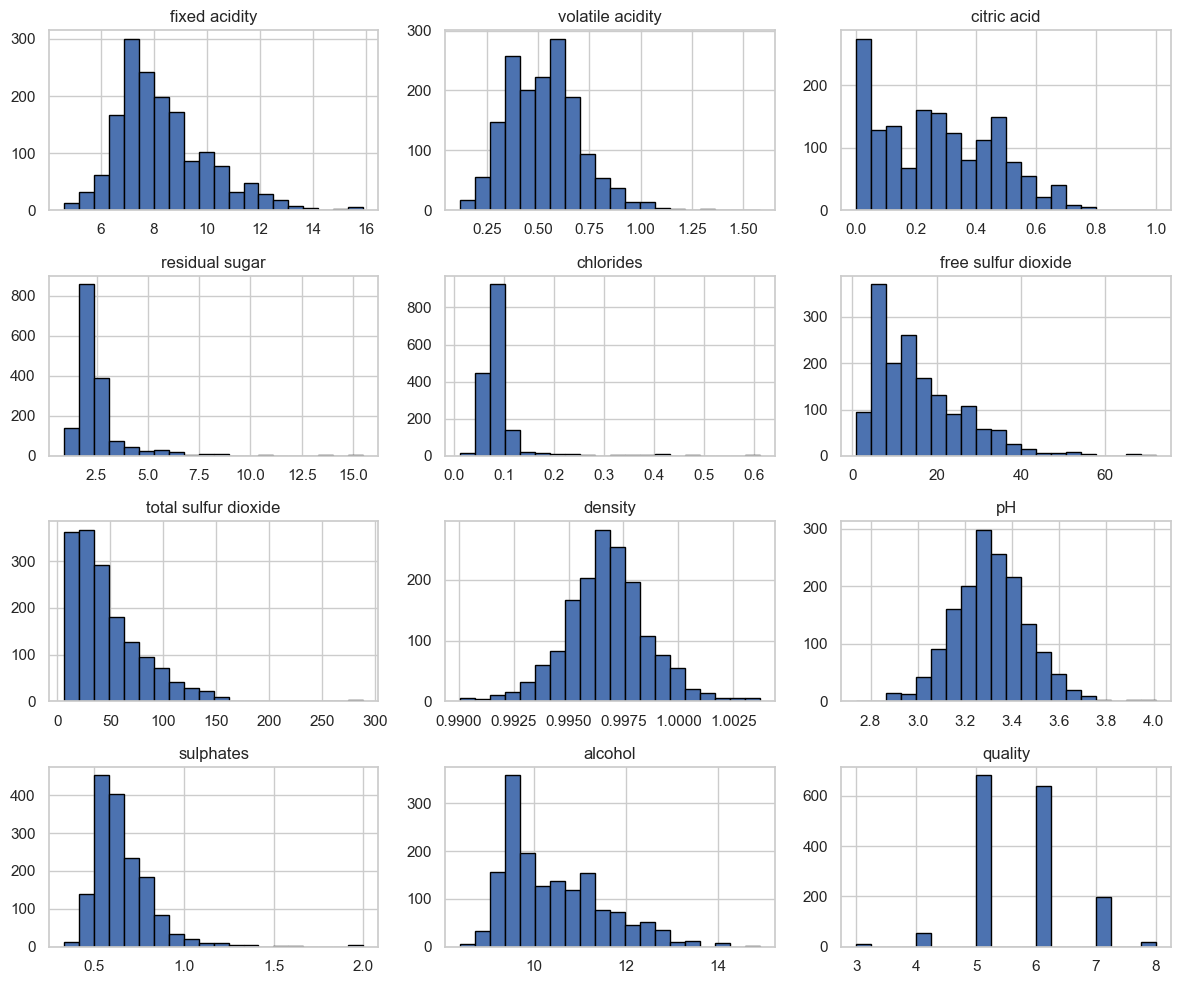

In [6]:

# 7. Гистограммы распределения значений для всех признаков
df.hist(bins=20, figsize=(12,10), layout=(4,3), edgecolor='black')
plt.tight_layout()
plt.show()


{'alcohol': {'lower': 7.1000000000000005, 'outliers_count': 13, 'upper': 13.5},
 'chlorides': {'lower': 0.04000000000000002,
               'outliers_count': 112,
               'upper': 0.11999999999999998},
 'citric acid': {'lower': -0.4049999999999999,
                 'outliers_count': 1,
                 'upper': 0.9149999999999999},
 'density': {'lower': 0.9922475000000001,
             'outliers_count': 45,
             'upper': 1.0011875},
 'fixed acidity': {'lower': 3.95,
                   'outliers_count': 49,
                   'upper': 12.349999999999998},
 'free sulfur dioxide': {'lower': -14.0, 'outliers_count': 30, 'upper': 42.0},
 'pH': {'lower': 2.925, 'outliers_count': 35, 'upper': 3.6849999999999996},
 'quality': {'lower': 3.5, 'outliers_count': 28, 'upper': 7.5},
 'residual sugar': {'lower': 0.8499999999999996,
                    'outliers_count': 155,
                    'upper': 3.6500000000000004},
 'sulphates': {'lower': 0.28000000000000014,
               'ou

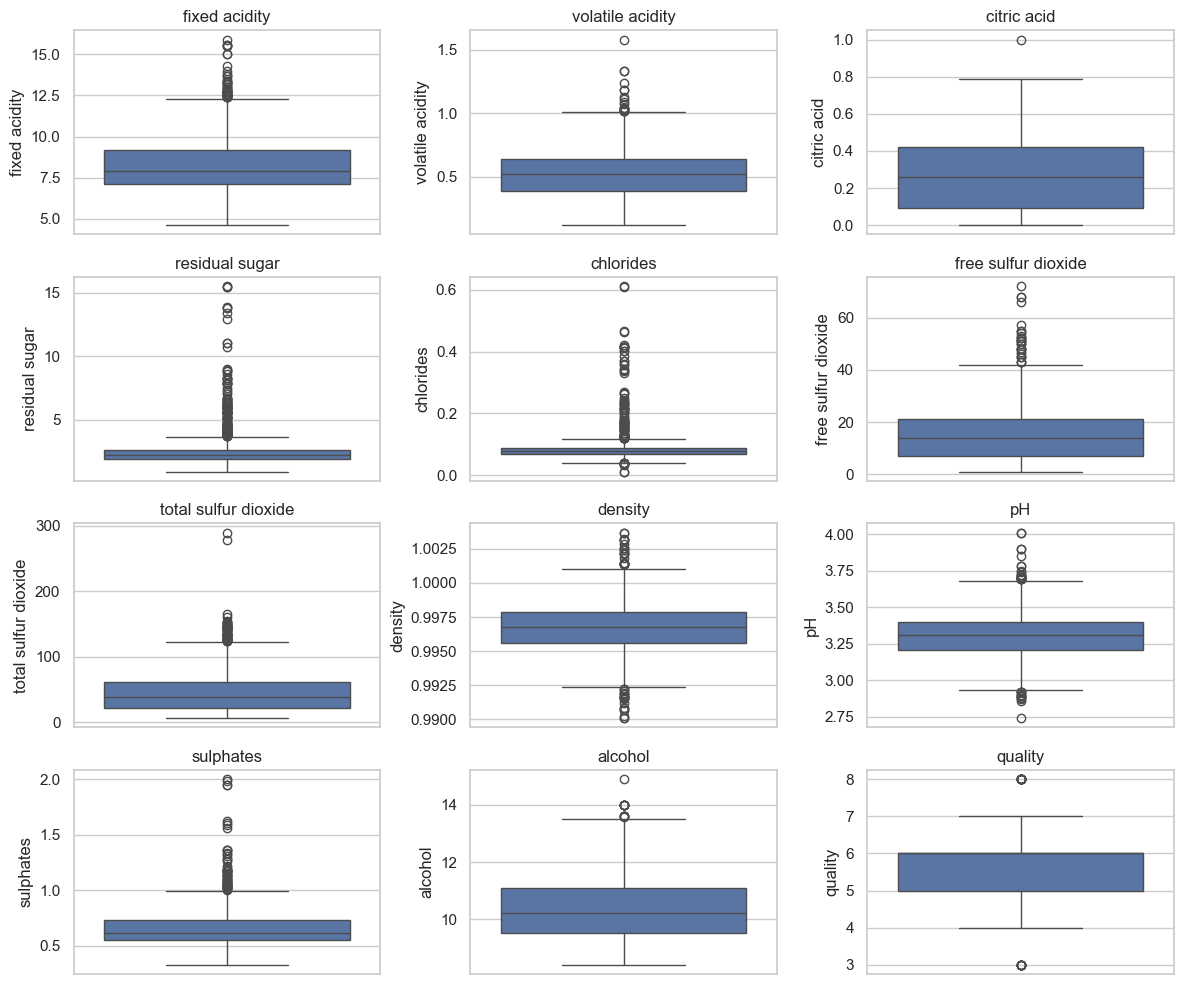

In [7]:

# 8. Поиск выбросов: метод IQR и boxplots
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum(), lower, upper

outliers_report = {}
for col in df.select_dtypes(include=[np.number]).columns:
    cnt, low, up = detect_outliers_iqr(df[col].dropna())
    outliers_report[col] = {'outliers_count': int(cnt), 'lower': float(low), 'upper': float(up)}

import pprint
pprint.pprint(outliers_report)
# Boxplots
plt.figure(figsize=(12,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()



## Обработка пропущенных значений (предложения)
- Если пропусков мало (несколько строк) — можно удалить строки `df.dropna()`.  
- Для числовых признаков часто используют заполнение медианой или средним:  
  `df['col'] = df['col'].fillna(df['col'].median())`  
- Можно применять KNN‑импутацию или модели (например, IterativeImputer) для более сложной структуры пропусков.  
- Обязательно фиксируйте, какие столбцы и сколько строк были изменены — записывайте в отчёт.


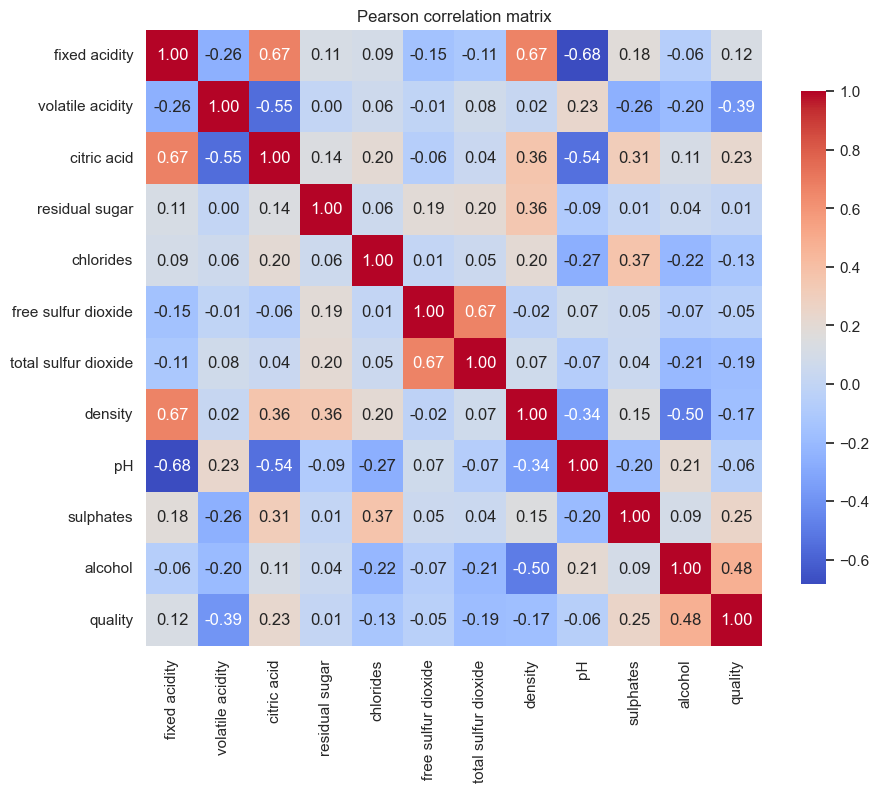

[]

In [ ]:

# 9. Корреляция между параметрами
corr = df.corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink':.8})
plt.title('Pearson correlation matrix')
plt.show()


high_corr = []
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        r = corr.iloc[i,j]
        if abs(r) > 0.7:
            high_corr.append((corr.index[i], corr.columns[j], r))
high_corr


In [ ]:

# 10. Матрица графиков рассеяния (scatter matrix) для числовых признаков
from pandas.plotting import scatter_matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12,12))
scatter_matrix(df[numeric_cols], alpha=0.4, figsize=(12,12), diagonal='kde')
plt.suptitle('Scatter matrix')
plt.show()



## Анализ результатов и выводы

- **Какие атрибуты высококоррелированы:** см. таблицу `high_corr` и тепловую карту. Обычно `density` коррелирует с `alcohol` и `residual sugar` в той или иной степени; часто `free sulfur dioxide` и `total sulfur dioxide` имеют заметную связь. Точный список зависит от результата матрицы корреляций.  
- **Атрибуты без корреляции:** признаки с коэффициентами около 0 — они независимы.  
- **Выбросы:** определяются по boxplot и IQR; для некоторых признаков (например, `residual sugar`, `chlorides`) встречаются выбросы — можно применять удаление по порогу или трансформации (логарифм).  
- **Пропуски:** в стандартном датасете Wine Quality пропусков обычно нет; если они появятся (после объединений и пр.), следуйте предложенным методам иммутации.



---
**Готово** 
